In [3]:
pip install kneed

  Using cached kneed-0.8.1-py2.py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [99]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


## r = 1, l = 2, o = 0
---
___

# classification
~~1. KNN (k-nearest neighbor)~~
~~2. Decision Tree~~
~~3. Random Forest~~
~~4. Naive Bayes~~

5. SVM (Support Vector Machine)

# Regression
1. Support Vector Regression

In [10]:
from sklearn.datasets import make_blobs
features, true_labels = make_blobs(
        n_samples=200,
        centers=2,
        cluster_std=2.75,
        random_state=42
   )

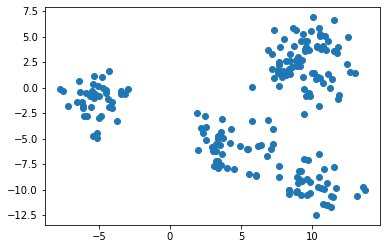

In [13]:
from sklearn.model_selection import train_test_split
X, _ = make_blobs(n_samples= 200, centers= 5, random_state=4, cluster_std=1.5)
plt.scatter(X[:,0],X[:,1])
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

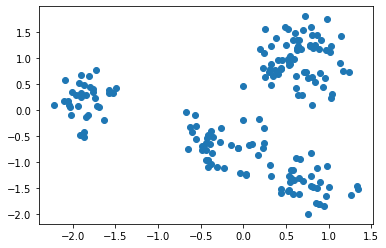

In [15]:
# 메소드체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)

# 위와 동일하지만 더 효율적입니다(fit_transform)
X_scaled_d = scaler.fit_transform(X_train)

#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

plt.scatter(X_scaled[:,0],X_scaled[:,1])

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)  #train꺼로 transform한걸로 fit 중요!!!!
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

NameError: name 'axes' is not defined

In [3]:
os.chdir("./imgcsv")

In [4]:
df = pd.read_csv("combined_direction_csv.csv")
df[df.columns[:-1]].head()

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.975,0.179348,0.285255,-0.941522,-0.233119,0.300690,-0.924792,-0.029,0.304,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0.975,0.082859,0.389287,-0.917382,-0.333520,0.364557,-0.869404,-0.139,0.399,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0,0.975,0.117509,0.152782,-0.981249,-0.287088,0.242902,-0.926596,-0.089,0.204,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,0.975,0.115496,0.274159,-0.954724,-0.122216,0.259011,-0.958111,-0.004,0.272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.975,0.115496,0.274159,-0.954724,-0.122216,0.259011,-0.958111,-0.004,0.272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[df.columns[-1:]],
                                                    random_state=0)

In [91]:
clf = svm.SVC(C=100, kernel = 'linear')
clf.fit(X_train,y_train)
print(pf_svm.score(X_test,y_test))

0.5


c:\users\seong\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [92]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
clf.fit(X_train_scaled, y_train)
print(clf.score(X_test_scaled, y_test))

0.8


c:\users\seong\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
clf.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print(clf.score(X_test_scaled, y_test))

0.8


c:\users\seong\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [94]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
clf.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print(clf.score(X_test_scaled, y_test))

0.8


c:\users\seong\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [95]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
clf.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print(clf.score(X_test_scaled, y_test))

0.4


c:\users\seong\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [107]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution = 'normal')
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
clf.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print(clf.score(X_test_scaled, y_test))

c:\users\seong\anaconda3\envs\py37\lib\site-packages\sklearn\preprocessing\_data.py:2615: UserWarning: n_quantiles (1000) is greater than the total number of samples (28). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


1.0


c:\users\seong\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [97]:
from sklearn.preprocessing import PowerTransformer
scaler = QuantileTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
clf.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print(clf.score(X_test_scaled, y_test))

1.0


c:\users\seong\anaconda3\envs\py37\lib\site-packages\sklearn\preprocessing\_data.py:2615: UserWarning: n_quantiles (1000) is greater than the total number of samples (28). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\users\seong\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [43]:
os.chdir('C:\\Users\\seong\\WorkSpace\\testfornothing\\eye_tracker\\open_face')
os.getcwd()

'C:\\Users\\seong\\WorkSpace\\testfornothing\\eye_tracker\\open_face'

In [79]:
vddata = pd.read_csv('sample1.csv')
vd_data = vddata[vddata[' success'] == 1]
col1 = vd_data.columns[1:2].to_list()
col2 = vd_data.columns[3:4].to_list()
col3 = vd_data.columns[5:].to_list()
vddata_form_train_columns = col1 + col2 + col3
# print(vddata_form_train_columns)
new_data = vd_data[vddata_form_train_columns]
len(new_data.columns)

711

In [104]:
encoding = new_data
encoding['direction'] = clf.predict(new_data)
encoding['direction'].mask(encoding['direction'] == 'o', 0 , inplace=True )
encoding['direction'].mask(encoding['direction'] == 'l', 1 , inplace=True )
# encoding['direction'] = np.where(encoding['direction']=='l', value_if_true, value_if_false)
encoding.loc[encoding['direction'] == 'r', 'direction'] = 2

c:\users\seong\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\seong\anaconda3\envs\py37\lib\site-packages\pandas\core\generic.py:9282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast
c:\users\seong\anaconda3\envs\py37\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not    direction
31         r
33         l
32         r
37         o
35         r
30         r
34         r
8          l
13         c
5          l
17         l
14         c
7          l
28         l
1          c
12         r
27         l
24         c
6          l
23         c
4          c
18         l
21         r
19         r
9          r
36         o
3          c
0          c

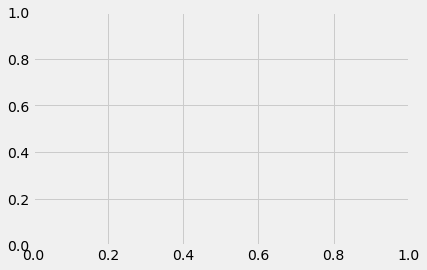

In [105]:
# 샘플 데이터 표현
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_train, s=30, cmap=plt.cm.Paired)
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()